<a href="https://colab.research.google.com/github/shubhii0206/AssignmentCodes/blob/master/IPL_ScorePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [79]:
ipl = pd.read_csv("/content/drive/MyDrive/ipl_data.csv") # loading ipl data
ipl.head() # displaying top 5 rows

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [80]:
ipl.info() # getting info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [81]:
ipl.describe() # getting statistical info about data

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [82]:
ipl.isnull().sum() # checking for null values
# we dont have any null values as shown below

,0
mid,0
date,0
venue,0
bat_team,0
bowl_team,0
batsman,0
bowler,0
runs,0
wickets,0
overs,0


In [83]:
#drop the features that do not contribute to the final result
df = ipl.drop(['runs_last_5','wickets_last_5','mid', 'striker', 'non-striker'], axis =1)


In [84]:
df['bat_team'].unique() # getting unique values in bat_team column

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [85]:
famous_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [86]:
df = df[(df['bat_team'].isin(famous_teams)) & (df['bowl_team'].isin(famous_teams))] #Remove inconsistent team


In [87]:
df['bat_team'].unique()


array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [88]:
df['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad'], dtype=object)

In [89]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d')) #Convert into Date format

In [90]:
df = df[df['overs']>=5.0] #intial 5 overs do not contribute much in predicting scores
df.head()

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,61,0,5.1,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,Z Khan,61,1,5.2,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.3,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.4,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.5,222


In [91]:
X = df.drop(labels='total', axis=1)
y = df['total']

In [92]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


In [93]:
X.head()


,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs
32,2008-04-18,13,3,6,46,269,61,0,5.1
33,2008-04-18,13,3,6,262,269,61,1,5.2
34,2008-04-18,13,3,6,242,269,61,1,5.3
35,2008-04-18,13,3,6,242,269,61,1,5.4
36,2008-04-18,13,3,6,242,269,61,1,5.5


In [94]:
X_train = X.drop(labels = 'date', axis = 1)[df['date'].dt.year <= 2016] # data till 2016
X_test = X.drop(labels = 'date', axis = 1) [df['date'].dt.year >= 2017] # data after 2016
y_train = y[df['date'].dt.year <= 2016].values
y_test = y[df['date'].dt.year >= 2017].values

In [95]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37330, 8) (2778, 8) (37330,) (2778,)


In [96]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
'''The code defines a regression model with three layers: an input layer, two hidden layers using ReLU activation,
and an output layer with linear activation to predict continuous values. It uses the **Huber loss**, a robust loss function that combines MSE and MAE to handle outliers effectively,
with the `Adam` optimizer for training. The model is compiled and ready to learn patterns from scaled input data.'''

import keras
import tensorflow as tf

model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer matching the number of features in X_train_scaled
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 units and ReLU activation
    keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer for regression with linear activation
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

In [98]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 87.0246 - val_loss: 20.0225
Epoch 2/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.5282 - val_loss: 11.8973
Epoch 3/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 13.1230 - val_loss: 11.6183
Epoch 4/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12.6592 - val_loss: 11.6040
Epoch 5/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.5351 - val_loss: 11.6009
Epoch 6/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.3903 - val_loss: 11.6550
Epoch 7/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.4558 - val_loss: 11.7788
Epoch 8/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.5210 - val_loss: 11.7935
Epoch 9/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.3984 - val_loss: 11.7592
Epoch 10/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.4609 - val_loss: 11.8368
Epoch 11/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.4168 - val_loss: 11.7355
Epoch 12/50
584/584 ━━━━━━━━━━

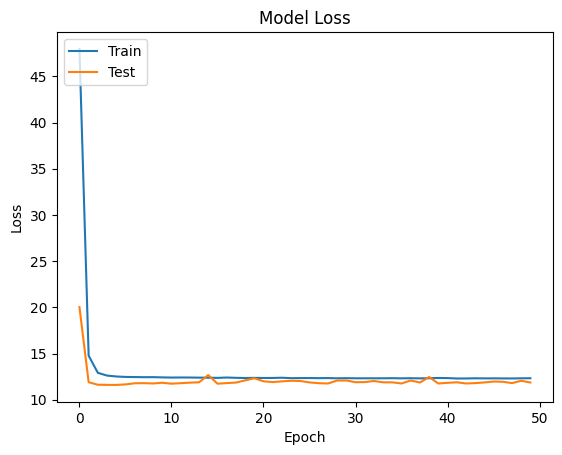

In [99]:
# plot loss

# Assuming 'history' object contains the training history from model.fit

import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [100]:
y_pred = model.predict(X_test_scaled)


87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [102]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 265.4646911621094
Mean Absolute Error: 12.352246284484863
R-squared: 0.7379950284957886


In [103]:
import ipywidgets as widgets
from IPython.display import display, clear_output

'''This code creates interactive widgets to input cricket match data (e.g., venue, teams, players, runs, etc.), and upon clicking the "Predict Score" button,
it processes the inputs, scales the data, and uses a trained model to predict the score'''

import warnings
warnings.filterwarnings("ignore")

# Creating dropdowns and input fields for user inputs
venue = widgets.Dropdown(options=df['venue'].unique().tolist(), description='Select Venue:')
batting_team = widgets.Dropdown(options=df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Bowling Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')
runs = widgets.IntText(description='Runs')
wickets = widgets.IntText(description='Wickets')
overs = widgets.FloatText(description='Overs')

# Button to trigger prediction
predict_button = widgets.Button(description="Predict Score")

# Function to handle prediction when button is clicked
def predict_score(b):
    with output:
        clear_output()  # Clear previous output

        # Encode selected values into model-compatible numerical format
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])

        # Collect numerical inputs
        runs_text = int(runs.value)
        wickets_text = int(wickets.value)
        overs_text = float(overs.value)

        # Prepare input array and scale it
        input = np.array([decoded_venue[0], decoded_batting_team[0], decoded_bowling_team[0],
                          decoded_striker[0], decoded_bowler[0], runs_text, wickets_text, overs_text])
        input = input.reshape(1, 8)
        input = scaler.transform(input)

        # Predict the score using the trained model
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0, 0])  # Get the predicted score



        print(predicted_score)

In [104]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, runs,wickets,overs,predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('BB McCullum', 'SC Ganguly', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL White', 'P…

IntText(value=0, description='runs')

IntText(value=0, description='wickets')

FloatText(value=0.0, description='overs')

Button(description='Predict Score', style=ButtonStyle())

Output()